## DAND P2 INVESTIGATE A DATASET##

*** By Richard Lorenzo***

*** Dataset Analyzed is Sean Lahman Baseball data from 1871 to 2014.***

The Data Source was downloaded from www.seanlahman.com.
By Richard Lorenzo

**Analysis -- PART 1: Characteristics of the Best Players**

The Sean Lahman baseball data is a complete record of all players and statistics.  I will compare a sample of the best players to all players to indentify which characteristics are statistically significant and which are not.  I define the best players as those who have won awards in their playing career.  I will confirm the validity of the definition by comparing the years played for this sample to the overall population.

*Question for investigation:*  The dataset includes basic player information including birthdate, height, weight, L/R Handedness, debut date, and final game date.  Which of these characteristics are stastically significant different for the "best players" as compared to the total population?


** Analysis -- PART 2: Pitching vs. Batting**

Baseball is fundementally a conflict between pitching and hitting.  I measured the correlation between these statisics over time.  I selected ERA (Earned Run Average) to represent the pitching metric, and "Runs" / "At bats" to represent batting.  I would not expect a 100% correlation because fielding errors are not included in ERA.

*Question for investigation:* What is the correlation between ERA and ("Runs / At Bat") over time?

***What I did to investigate these questions?***
1. I imported the .csv files into Pandas dataframes
2. Data wrangling: I dropped players with missing key characteristics, and I cleansed the data to correct different year formats
3. I derived years played from the debut year and final year
4. I scaled hitting and throwing handedness to numerical values.
5. I mapped the players who won awards in their careers
6. I used the Pandas describe function to compare the sample of Players who won awards to the whole population of players.
7. Using T tests, I proposed a null Hypothosis for each variable and rejected, or failed to reject them.
8. I analyzed histograms of the following distributions - Years Played (all vs won-Awards), Birth Year (all vs won-Awards)
9. I imported the Pitching and Batting data and grouped the statistics by year.
10. I visually looked for correlations with a scatter plot which showed different correlations over time.  I calculated Pearson's r to measure the coorelation.
11. I analyzed the Pitching-Hitting correlations over different years to increase each correlation and showed the associated scatter plots.

*** Data Wrangling***  I imported the csv files, droped players with incomplete key charactistics, and corrected different year formats

*** Summary statistics and plots *** included ate the end of the notebook

*** Webisites and sources used ***
1. Udacity DAND material
2. v19.2 Pandas documentation
3. Matplotlib documentation
4. Miscellaneous Stackoverflow posts



In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy import stats
from IPython.display import display

/Users/mattelisa/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# DataWrangling
# Read data, drop incomplete rows, and clean-up formats
df_master = pd.read_csv("master.csv", index_col='playerID')
#
# Select the features we want to look for correlation
# Filter Data for players with missing information
df_master1 = df_master[['birthYear', 'birthMonth', 'weight', 'height',\
           'bats', 'throws', 'debut', 'finalGame' ]].dropna(axis =0)
# Clean-Up the dates into Debut Year and Final Game Year
def clean_date(s): 
    if s[:3].isdigit():
        return int(s[:4])
    else:
        l = len(s)
        return int(s[(l-4):l])

df_master1['debut_yr'] = df_master1['debut'].apply(clean_date)
df_master1['final_yr'] = df_master1['finalGame'].apply(clean_date)
################################
# Refine the Independent variables.
#
# debut_yr and final_yr are correlated with birthYear.  The more interesting variable is years played.
#
# Also, let's convert country, bats, and throws to a numeric scale to simplify the analysis
# - bats/throws: R = +1, B = 0, L = -1
################################
df_master1['yearsPlayed'] = df_master1['final_yr'] - df_master1['debut_yr']
df_master1['bats_num'] = df_master1['bats'].apply(lambda s: -1 if s=='L' else 1 if s=='R' else 0)
df_master1['throws_num'] = df_master1['throws'].apply(lambda s: -1 if s=='L' else 1)
################################
# Next we identify the players that have won awards vs. no awards.
#
# Import the awards Dataframe, and join it to the master Dataframe
################################
df_awards = pd.read_csv("AwardsPlayers.csv", index_col='playerID')
# Since we want to look as any awards, add a wonAward boolean
df_awards['wonAward'] = True

# Join the Dataframes and create a new Dataframe with just the key information
df_master2 = df_master1.join(df_awards['wonAward'])\
                .drop_duplicates()[['birthYear', 'birthMonth', 'weight',\
                                    'height', 'bats_num', 'throws_num', 'yearsPlayed', 'wonAward']]
# Create a 3D Pandas Panel to compare the .describe() stats
df_won = df_master2[(df_master2['wonAward'] == True)]
df_all = df_master2

d = {"won" : df_won.describe(),
    "all" : df_master2.describe()}
panel = pd.Panel.from_dict(d , orient='minor')
#
# Perform one sample, two-tailed, Hypothesis Testing
#
null_Hypthosis = {'birthYear' : 'Birth Year for players with awards = all players',
                 'birthMonth' : 'Birth Month for players with awards = all players',
                 'weight' : 'weight for players with awards = all players',
                 'height' : 'height for players with awards = all players',
                 'bats_num' : 'bats handedness for players with awards = all players',
                 'throws_num' : 'throws handedness for players with awards = all players',
                 'yearsPlayed' : 'Years Played for players with awards = all players'}
alpha = 0.001
index = ['birthYear', 'birthMonth', 'weight', 'height','bats_num','throws_num', 'yearsPlayed' ]
data = []
for i, idx in enumerate(index):
    print
    print "The Null Hypothsis: " + null_Hypthosis[idx]
    print "alpha = ", alpha
    t = stats.ttest_1samp(df_won[idx].values, df_all[idx].describe()['mean'])
    print "The One Sample, two-Sided T-test = ", t[0]
    print "The Probability is: ", t[1]
    if t[1] < alpha:
        s = "The Null Hypothosis IS Rejected"
    else:
        s = "The Null Hypthosis CANNOT be rejected"
    print s    
    data.append([null_Hypthosis[idx], t[0], t[1], s])

df_tTests = pd.DataFrame(data, index = index)
df_tTests.columns = ['Null Hypothesis', 'T-Test', 'Probability' , 'Result']


The Null Hypothsis: Birth Year for players with awards = all players
alpha =  0.001
The One Sample, two-Sided T-test =  6.7118705759
The Probability is:  2.85834469719e-11
The Null Hypothosis IS Rejected

The Null Hypothsis: Birth Month for players with awards = all players
alpha =  0.001
The One Sample, two-Sided T-test =  0.249029144685
The Probability is:  0.803377454142
The Null Hypthosis CANNOT be rejected

The Null Hypothsis: weight for players with awards = all players
alpha =  0.001
The One Sample, two-Sided T-test =  6.02560806132
The Probability is:  2.18875216234e-09
The Null Hypothosis IS Rejected

The Null Hypothsis: height for players with awards = all players
alpha =  0.001
The One Sample, two-Sided T-test =  4.56626790378
The Probability is:  5.43384975506e-06
The Null Hypothosis IS Rejected

The Null Hypothsis: bats handedness for players with awards = all players
alpha =  0.001
The One Sample, two-Sided T-test =  -1.105344734
The Probability is:  0.269214136369
The N

## PART 1: Characteristics of the Best Players##

## RESULTS: Hypothesis Testing ##

I compared the characteristics of the players who have won awards to the all players.

The above cell shows the detailed results of the one sample, two-tailed, Hypothesis tests performed on each of 7 characteristics with an ultra conservative **alpha = 0.001**.

From this analysis, the evidence supports that Players who have won awards are:
- **Born Later** (possible due to awards/players increasing over time)
- **Bigger** (weigh more and are taller)  Although significant, it is import that this does not imply causation.
- **Played Longer** (It is expected that better players play longer.  Histograms are shown next)

Although Players with awards are slightly more left-handed at batting and throwing, the p-values are only 0.262	0.165 respectively and are not statistically significant.

Birth Month is also consistent between players with awards to all players.  (I included this analysis to because there are studies showing a link in birth month for Canadian hockey players due to league cut-offs in childrens leagues.  This is not supported for Baseball players.)

***The following cell shows the summarized data:***

In [3]:
display(panel.to_frame())

birthYear    birthMonth        weight        height  \
major minor                                                           
count all    16970.000000  16970.000000  16970.000000  16970.000000   
      won     1305.000000   1305.000000   1305.000000   1305.000000   
mean  all     1935.160695      6.634119    186.299823     72.353565   
      won     1941.071264      6.657471    189.891188     72.652107   
std   all       37.848612      3.463925     20.829660      2.548979   
      won       31.812000      3.387532     21.530983      2.361835   
min   all     1835.000000      1.000000     65.000000     43.000000   
      won     1854.000000      1.000000    125.000000     65.000000   
25%   all     1902.000000      4.000000    170.000000     71.000000   
      won     1916.000000      4.000000    175.000000     71.000000   
50%   all     1941.000000      7.000000    185.000000     72.000000   
      won     1947.000000      7.000000    185.000000     73.000000   
75%   all     1969.000000     10.000000    200.000000     74.000000   
      won     1967.000000     10.000000    200.000000     74.000000   
max   all     1994.000000     12.000000    320.000000     83.000000   
      won     1992.000000     12.000000    295.000000     82.000000   

                 bats_num    throws_num   yearsPlayed  
major minor                                            
count all    16970.000000  16970.000000  16970.000000  
      won     1305.000000   1305.000000   1305.000000  
mean  all        0.379788      0.597643      5.008898  
      won        0.352490      0.627586     13.173180  
std   all        0.888546      0.801786      5.076965  
      won        0.892133      0.778846      4.620976  
min   all       -1.000000     -1.000000      0.000000  
      won       -1.000000     -1.000000      0.000000  
25%   all       -1.000000      1.000000      1.000000  
      won       -1.000000      1.000000     10.000000  
50%   all        1.000000      1.000000      4.000000  
      won        1.000000      1.000000     13.000000  
75%   all        1.000000      1.000000      8.000000  
      won        1.000000      1.000000     16.000000  
max   all        1.000000      1.000000     35.000000  
      won        1.000000      1.000000     31.000000

In [4]:
display(df_tTests)

,Null Hypothesis,T-Test,Probability,Result
birthYear,Birth Year for players with awards = all players,6.711871,2.858345e-11,The Null Hypothosis IS Rejected
birthMonth,Birth Month for players with awards = all players,0.249029,8.033775e-01,The Null Hypthosis CANNOT be rejected
weight,weight for players with awards = all players,6.025608,2.188752e-09,The Null Hypothosis IS Rejected
height,height for players with awards = all players,4.566268,5.433850e-06,The Null Hypothosis IS Rejected
bats_num,bats handedness for players with awards = all ...,-1.105345,2.692141e-01,The Null Hypthosis CANNOT be rejected
throws_num,throws handedness for players with awards = al...,1.388845,1.651171e-01,The Null Hypthosis CANNOT be rejected
yearsPlayed,Years Played for players with awards = all pla...,63.824808,0.000000e+00,The Null Hypothosis IS Rejected


## yearsPlayed ##
While it is expected that the best players play longer, the following histograms emphasis the difference.

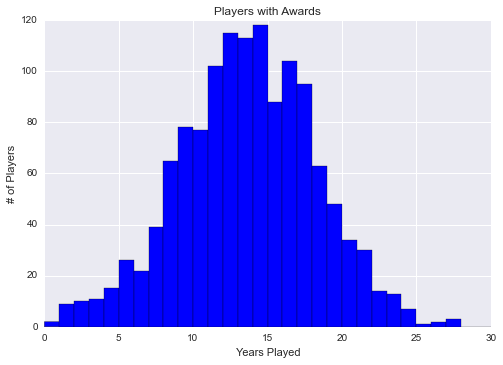

In [5]:
############################
# Histogram of Years Played by Players who have won Awards
#
plt.hist(df_won['yearsPlayed'],histtype='bar', bins = 30, range=(0,30), color ='b')
plt.xlabel('Years Played')
plt.ylabel('# of Players')
plt.title('Players with Awards')
plt.show()

### The distribution for Players with Awards (shown above) is close to a normal distribtion which is expected.

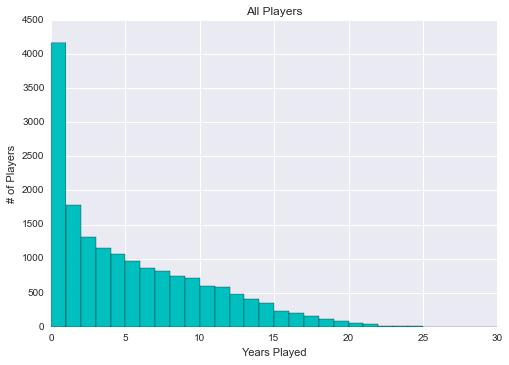

In [6]:
############################
# Histogram of Years Played For All Players
#
plt.hist(df_master2['yearsPlayed'],histtype='bar', bins = 30, range=(0,30), color ='c')
plt.xlabel('Years Played')
plt.ylabel('# of Players')
plt.title('All Players')
plt.show()

### The yearsPlayed distribution for All Players (shown above) is the oppposite with hyperbolic distribtion.

The next histograms compare the distribution of birth year


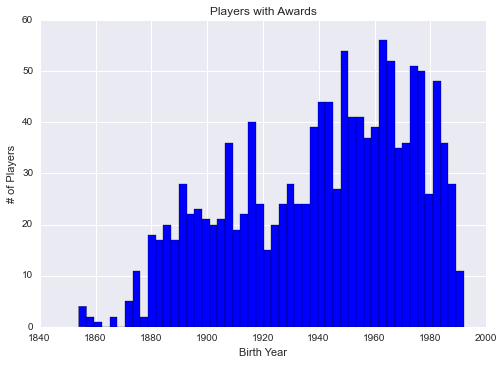

In [7]:
############################
# Histogram of Birth Year by Players who have won Awards
#
plt.hist(df_won['birthYear'],histtype='bar', bins = 50,color ='b')
plt.xlabel('Birth Year')
plt.ylabel('# of Players')
plt.title('Players with Awards')
plt.show()

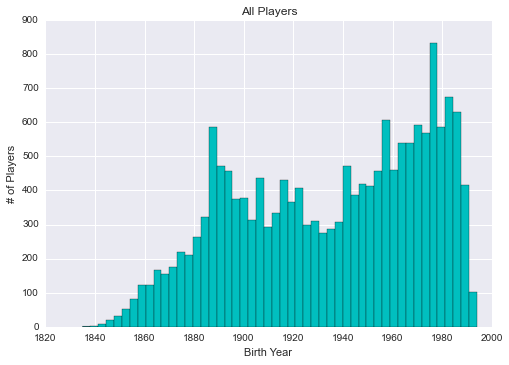

In [8]:
############################
# Histogram of Birth Year For All Players
#
plt.hist(df_master2['birthYear'],histtype='bar', bins = 50, color ='c')
plt.xlabel('Birth Year')
plt.ylabel('# of Players')
plt.title('All Players')
plt.show()

## Both histograms for birthYear have similar distributions

### End of Analysis -- Part 1. 

------------

## Analysis -- PART 2: Pitching vs. Batting


Baseball is fundementally a conflict between pitching and hitting.  I measured the correlation between these statisics over time.  I selected ERA (Earned Run Average) to represent the pitching metric, and "Runs" / "At bats" to represent batting.  I would not expect a 100% correlation because fielding errors are not included in ERA.

* Question for investigation: What is the correlation between ERA and ("Runs / At Bat") over time?

In [9]:
#  Import the pitching data
df_pitching = pd.read_csv("pitching.csv")
# Get the Average ERA for each year
df_ERA_byYear = df_pitching[['ERA', 'yearID']].groupby('yearID').mean()

#  Get the Batting data
df_Batting = pd.read_csv("Batting.csv")

# Runs per At Bats should a better metic than batting average
df_runs_byYear = df_Batting[['R','AB','yearID']].groupby('yearID').sum()
df_runs_byYear['R_per_AB'] = df_runs_byYear['R'] / df_runs_byYear['AB']

# Joint the data to make a single df with the information we need
df_ERA_R_AB = df_ERA_byYear.join(df_runs_byYear['R_per_AB'])
############################
# Scatter Plot of ERA vs. Runs / At bats
#
#  Scale the plot to drop the outliers

def plot_scatter(df, max_x, max_y, min_Year, max_Year):
    # Filter the Dataframe
    dfx = df['ERA'][(df['R_per_AB'] < max_y) & (df['ERA'] < max_x) ]
    dfx = dfx.loc[dfx.index <= max_Year]
    dfx = dfx.loc[dfx.index >= min_Year]
    dfy = df['R_per_AB'][(df['R_per_AB'] < max_y) & (df['ERA'] < max_x)]
    dfy = dfy.loc[dfy.index <= max_Year]
    dfy = dfy.loc[dfy.index >= min_Year]

    plt.scatter(dfx, dfy, c = dfx.index.tolist(),cmap=cm.rainbow)
    plt.xlabel('ERA')
    plt.ylabel('Runs / At Bats')
    plt.title('Years '+ str(min_Year) + ' to ' + str(max_Year))
    clb = plt.colorbar()
    clb.ax.set_title('YEAR')
    plt.show()

def pearsons_r(df, min_Year, max_Year):
    # Filter the Dataframe
    df = df.loc[df.index <= max_Year]
    df = df.loc[df.index >= min_Year]
    return df.corr()

## Analysis -- PART 2: Pitching vs. Batting##

## RESULTS: Correlation Tests ##

The following scatter chart shows the correlation between ERA and R/AB over the time of the entire dataset -- 1871 through 2014



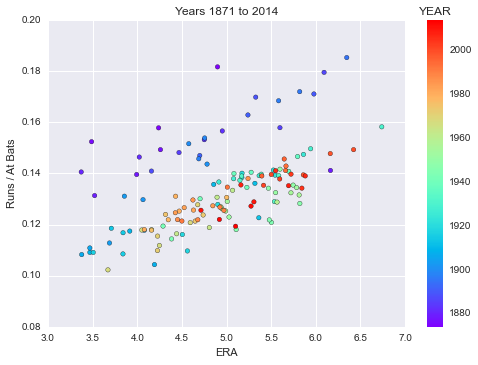

In [10]:
plot_scatter(df_ERA_R_AB, 7.0, 0.2, 1871, 2014)

## RESULTS: Pearson's R Correlation Coefficent:

### (1871 - 2014) ###

In [11]:
#  Use Pandas corr function to get Pearson's r correlation
pearsons_r(df_ERA_R_AB, 1871, 2014)

,ERA,R_per_AB
ERA,1.000000,0.524192
R_per_AB,0.524192,1.000000


Pearson's R show they are somewhat correlated at 0.52.

However, the scatter plot shows the correlations from 1871 through ~ 1910 have an offset which may be weaking the correlation.  Let's separate these date ranges.

## RESULTS: Pearson's R Correlation Coefficent:

### (1871 - 1910) ###

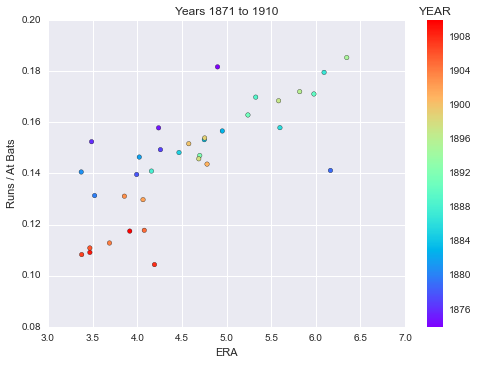

In [12]:
plot_scatter(df_ERA_R_AB, 7.0, 0.2, 1871, 1910)

In [13]:
pearsons_r(df_ERA_R_AB, 1871, 1910)

,ERA,R_per_AB
ERA,1.000000,0.631948
R_per_AB,0.631948,1.000000


### The correlation improved to 63% for years 1871 - 1910

## The Results for years 1910 - 2014 are below:

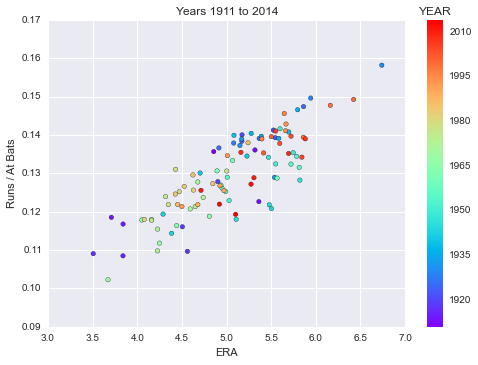

In [14]:
plot_scatter(df_ERA_R_AB, 7.0, 0.2, 1911, 2014)

In [15]:
pearsons_r(df_ERA_R_AB, 1911, 2014)

,ERA,R_per_AB
ERA,1.000000,0.831108
R_per_AB,0.831108,1.000000


### The correlation improved to 83% for years 1910 - 2014

As you can see, by splitting the analysis from (1871 - 1910) and (1911 - 2014) the correlations have increased. I will let others who are more knowledgble with baseball explain what happened to Baseball ~ 1910 to change Pitching / Hitting dynamics.

# CONCLUSIONS

### PART 1 ###

The best players, or the one who have won awards during their career have the following statistically significant difference to the population of all players:
- **Born Later** (possible due to awards/players increasing over time)
- **Bigger** (weigh more and are taller)  Although significant, it is import that this does not imply causation.
- **Played Longer** (It is expected that better players play longer.  Histograms are shown next)

These hypothesis tests are supported by one-sample, T-tests with an alpha of 0.001

#### Limitations and Future Investigations####

1. Of the significant player characteristics for the best players, I am most skepticle of the link to players who were born later.  I future investigation should standardize the awards/player/year before we come to the conclusion that recent players are "better" than earlier players.
2. The conclusions for the weight and height characteristics should be further studied based on the data on "yearsPlayed" histogram.  We see many players who only play one year.  A valuable investigation would be to compare the sample of these 1-year-only players as compared to all players.  for example, are the shorter and weigh less?

### PART 2 ###


Pitching and batting staistics are linearly correlated, but the tests show that the game changed in the early 20th century because these statistics are better correlated when studied from 1871 - 1910, and 1911 - 2014.

This surprising relationship became visible when viewing the scatter point over time.

#### Limitations and Future Investigations####

The change in the slope of the correlation coefficient in 1910 needs more analysis.  Further questions are:

1. Did the rules change?
2. Did the defintions of the statistics change -- specifically ERA?
3. The "noise" or reasons for a less than 100% correlation should due to errors which are excluded in ERA, and may be treated differently in the Runs stat.  A study of errors would be useful to look for changes between the early game (1871-1910) and the later game (1911 - 2014).



-----------
# Summary of statistics and plots #


In [16]:
display(df_tTests)

,Null Hypothesis,T-Test,Probability,Result
birthYear,Birth Year for players with awards = all players,6.711871,2.858345e-11,The Null Hypothosis IS Rejected
birthMonth,Birth Month for players with awards = all players,0.249029,8.033775e-01,The Null Hypthosis CANNOT be rejected
weight,weight for players with awards = all players,6.025608,2.188752e-09,The Null Hypothosis IS Rejected
height,height for players with awards = all players,4.566268,5.433850e-06,The Null Hypothosis IS Rejected
bats_num,bats handedness for players with awards = all ...,-1.105345,2.692141e-01,The Null Hypthosis CANNOT be rejected
throws_num,throws handedness for players with awards = al...,1.388845,1.651171e-01,The Null Hypthosis CANNOT be rejected
yearsPlayed,Years Played for players with awards = all pla...,63.824808,0.000000e+00,The Null Hypothosis IS Rejected


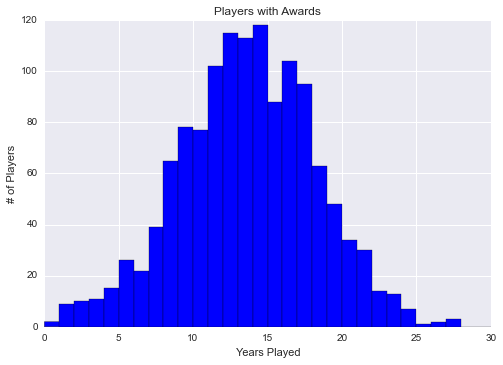

In [17]:
############################
# Histogram of Years Played by Players who have won Awards
#
plt.hist(df_won['yearsPlayed'],histtype='bar', bins = 30, range=(0,30), color ='b')
plt.xlabel('Years Played')
plt.ylabel('# of Players')
plt.title('Players with Awards')
plt.show()

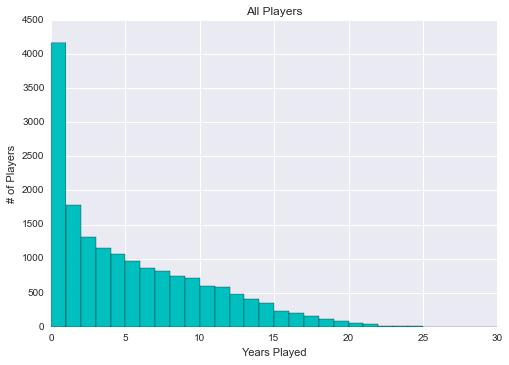

In [18]:
############################
# Histogram of Years Played For All Players
#
plt.hist(df_master2['yearsPlayed'],histtype='bar', bins = 30, range=(0,30), color ='c')
plt.xlabel('Years Played')
plt.ylabel('# of Players')
plt.title('All Players')
plt.show()

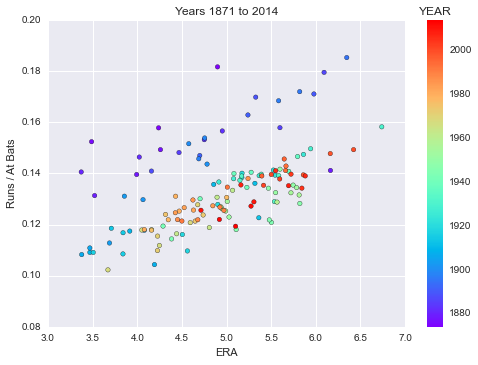

,ERA,R_per_AB
ERA,1.000000,0.524192
R_per_AB,0.524192,1.000000


In [19]:
plot_scatter(df_ERA_R_AB, 7.0, 0.2, 1871, 2014)
pearsons_r(df_ERA_R_AB, 1871, 2014)

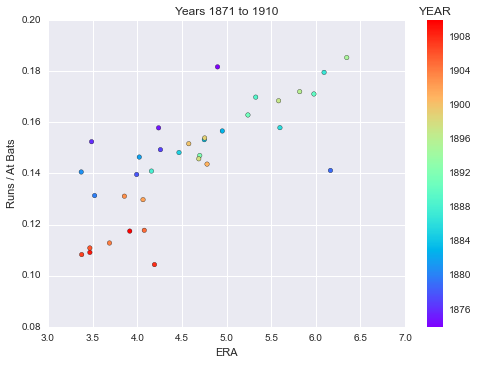

,ERA,R_per_AB
ERA,1.000000,0.631948
R_per_AB,0.631948,1.000000


In [20]:
plot_scatter(df_ERA_R_AB, 7.0, 0.2, 1871, 1910)
pearsons_r(df_ERA_R_AB, 1871, 1910)

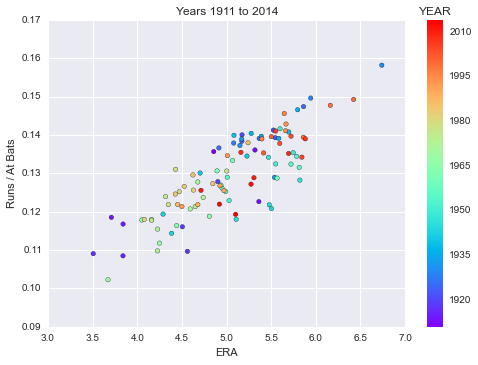

,ERA,R_per_AB
ERA,1.000000,0.831108
R_per_AB,0.831108,1.000000


In [21]:
plot_scatter(df_ERA_R_AB, 7.0, 0.2, 1911, 2014)
pearsons_r(df_ERA_R_AB, 1911, 2014)